# Classification on the [CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html) dataset using SVM with Python's Scikit-Learn
by [Zahra Taheri](https://github.com/zahta) (26 June 2020)

### Preperation for Google colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#unzip dataset files from google drive to content folder in colab

import os

if os.path.exists("/content/cifar-100/")==False:
  print("unzip files!")
  !unzip -q "/content/drive/My Drive/cifar-100.zip"

unzip files!


### Import libraries

In [4]:
import numpy as np
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(42)

## Loading CIFAR-100

In [5]:
def get_proper_images(raw):
    raw_float = np.array(raw, dtype=float) 
    images = raw_float.reshape([-1, 3, 32, 32])
    images = images.transpose([0, 2, 3, 1])
    return images.astype(int)

#def onehot_labels(labels):
#    return np.eye(100)[labels]

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [6]:
train_data=get_proper_images(unpickle('cifar-100-python/train')[b'data'])
#train_labels=onehot_labels(unpickle('cifar-100-python/train')[b'fine_labels'])
train_labels=unpickle('cifar-100-python/train')[b'fine_labels']
test_data=get_proper_images(unpickle('cifar-100-python/test')[b'data'])
#test_labels=onehot_labels(unpickle('cifar-100-python/test')[b'fine_labels'])
test_labels=unpickle('cifar-100-python/test')[b'fine_labels']

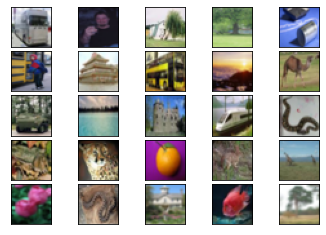

In [7]:
# display some random training images in a grid
num_plot = 5
f, ax = plt.subplots(num_plot, num_plot)
for m in range(num_plot):
    for n in range(num_plot):
        idx = np.random.randint(0, train_data.shape[0])
        ax[m, n].imshow(train_data[idx])
        ax[m, n].get_xaxis().set_visible(False)
        ax[m, n].get_yaxis().set_visible(False)
f.subplots_adjust(hspace=0.1)
f.subplots_adjust(wspace=0)
plt.show()

## Preparation of the dataset

In [8]:
X_train = train_data.astype('float32')
X_test = test_data.astype('float32')
X_train  /= 255.0
X_test /= 255.0

y_train,y_test=train_labels,test_labels
X_train.shape

(50000, 32, 32, 3)

In [9]:
nsamples, a,b,c = X_train.shape
X_train= X_train.reshape((nsamples,a*b*c))
nsamples, a,b,c = X_test.shape
X_test= X_test.reshape((nsamples,a*b*c))

In [10]:
X_train.shape

(50000, 3072)

In [11]:
#from sklearn import preprocessing

#std_scale = preprocessing.StandardScaler()
#X_train = std_scale.fit_transform(X_train)
#X_test = std_scale.fit_transform(X_test)

#minmax_scale = preprocessing.MinMaxScaler()
#X_train = minmax_scale.fit_transform(X_train)
#X_test = minmax_scale.fit_transform(X_test)

## Train and test Support vector machine models

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 

## Execusion time for the rest cells of this section: 10 hours 

## Output of the colab: None

In [ ]:
svm_clf1 = SVC(C=1, kernel="linear", random_state=42)
svm_clf1.fit(X_train, y_train)
y_pred = svm_clf1.predict(X_test)
print(svm_clf1.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
svm_clf2 = SVC(C=1, kernel="poly", random_state=42)
svm_clf2.fit(X_train, y_train)
y_pred = svm_clf2.predict(X_test)
print(svm_clf2.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
svm_clf3 = SVC(C=1, kernel="rbf", random_state=42)
svm_clf3.fit(X_train, y_train)
y_pred = svm_clf3.predict(X_test)
print(svm_clf3.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
svm_clf4 = SVC(C=0.1, kernel="linear", random_state=42)
svm_clf4.fit(X_train, y_train)
y_pred = svm_clf4.predict(X_test)
print(svm_clf4.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
svm_clf5 = SVC(C=0.1, kernel="poly", random_state=42)
svm_clf5.fit(X_train, y_train)
y_pred = svm_clf5.predict(X_test)
print(svm_clf5.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
svm_clf6 = SVC(C=0.1, kernel="rbf", random_state=42)
svm_clf6.fit(X_train, y_train)
y_pred = svm_clf6.predict(X_test)
print(svm_clf6.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
svm_clf8 = SVC(C=0.01, kernel="linear", random_state=42)
svm_clf8.fit(X_train, y_train)
y_pred = svm_clf8.predict(X_test)
print(svm_clf8.__class__.__name__, accuracy_score(y_test, y_pred))

##  With Principal Component Analysis (PCA)

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [14]:
X_train.shape

(50000, 202)

In [15]:
svm_clf1 = SVC(C=1, kernel="linear", random_state=42)
svm_clf1.fit(X_train, y_train)
y_pred = svm_clf1.predict(X_test)
print(svm_clf1.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.1764


In [16]:
svm_clf2 = SVC(C=1, kernel="poly", random_state=42)
svm_clf2.fit(X_train, y_train)
y_pred = svm_clf2.predict(X_test)
print(svm_clf2.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.2033


In [17]:
svm_clf3 = SVC(C=1, kernel="rbf", random_state=42)
svm_clf3.fit(X_train, y_train)
y_pred = svm_clf3.predict(X_test)
print(svm_clf3.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.2654


In [18]:
svm_clf4 = SVC(C=0.1, kernel="linear", random_state=42)
svm_clf4.fit(X_train, y_train)
y_pred = svm_clf4.predict(X_test)
print(svm_clf4.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.1957


In [19]:
svm_clf5 = SVC(C=0.1, kernel="poly", random_state=42)
svm_clf5.fit(X_train, y_train)
y_pred = svm_clf5.predict(X_test)
print(svm_clf5.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.1303


In [ ]:
svm_clf6 = SVC(C=0.1, kernel="rbf", random_state=42)
svm_clf6.fit(X_train, y_train)
y_pred = svm_clf6.predict(X_test)
print(svm_clf6.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
svm_clf7 = SVC(C=10, kernel="linear", random_state=42)
svm_clf7.fit(X_train, y_train)
y_pred = svm_clf7.predict(X_test)
print(svm_clf7.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
svm_clf8 = SVC(C=0.01, kernel="linear", random_state=42)
svm_clf8.fit(X_train, y_train)
y_pred = svm_clf8.predict(X_test)
print(svm_clf8.__class__.__name__, accuracy_score(y_test, y_pred))